<a href="https://colab.research.google.com/github/Bellezatabaskena/IngSoftware/blob/main/EjercicioNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**¿Qué es el Enfoque Bayesiano?**
 Un sistema basado en el conocimiento que utiliza el enfoque bayesiano se basa en la teoría de probabilidad bayesiana para modelar la incertidumbre y la toma de decisiones. Este enfoque se utiliza comúnmente en sistemas de inteligencia artificial, especialmente en áreas como el aprendizaje automático y la inteligencia artificial probabilística. Aquí hay algunos aspectos clave sobre cómo funciona un sistema basado en el conocimiento con enfoque bayesiano:

1. **Teoría de Probabilidad Bayesiana:**
   - La teoría de probabilidad bayesiana se basa en el teorema de Bayes, que describe cómo se puede actualizar la probabilidad de una hipótesis en función de nueva evidencia.
   - La fórmula del teorema de Bayes es: P(H|E) = P(E|H) * P(H) / P(E), donde:
      - P(H|E) es la probabilidad de la hipótesis H dado el evento E.
      - P(E|H) es la probabilidad del evento E dado que la hipótesis H es cierta.
      - P(H) es la probabilidad a priori de la hipótesis H.
      - P(E) es la probabilidad a priori del evento E.

2. **Modelado de Conocimiento:**
   - En un sistema basado en el conocimiento con enfoque bayesiano, se construyen modelos probabilísticos para representar el conocimiento.
   - Las creencias iniciales (probabilidades a priori) se establecen en función del conocimiento existente antes de observar nueva evidencia.

3. **Actualización de Creencias:**
   - A medida que se recopila nueva evidencia, las creencias se actualizan utilizando el teorema de Bayes.
   - Esto significa que las probabilidades a priori se ajustan en función de la nueva información disponible.

4. **Redes Bayesianas:**
   - Las redes bayesianas son un tipo común de modelo en este enfoque. Son estructuras gráficas que representan relaciones probabilísticas entre diferentes variables.
   - Las aristas en la red indican dependencias probabilísticas entre las variables.

5. **Aplicaciones Prácticas:**
   - Este enfoque se utiliza en una variedad de aplicaciones, como diagnóstico médico, sistemas de recomendación, procesamiento de lenguaje natural y toma de decisiones en entornos inciertos.

6. **Ventajas:**
   - El enfoque bayesiano es útil cuando hay incertidumbre y variabilidad en los datos.
   - Permite la actualización continua de creencias a medida que se obtiene nueva información.

7. **Desafíos:**
   - La construcción de modelos bayesianos precisos puede ser compleja y requiere un buen conocimiento del dominio y de las relaciones probabilísticas entre las variables.

En resumen, un sistema basado en el conocimiento con enfoque bayesiano utiliza la teoría de probabilidad bayesiana para modelar la incertidumbre y la toma de decisiones en un entorno donde la información puede ser incompleta o variable.

# Ejercicio comprar o alquilar una casa

# New Section

Importación de las librerias para visualizar los datos de entrada.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

Datos de entradada. se carga el archivo comprar_alquilar.csv

In [ ]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


Para visualizar las muestras que tenemos

In [ ]:
print(dataframe.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


Histograma de caracteristicas

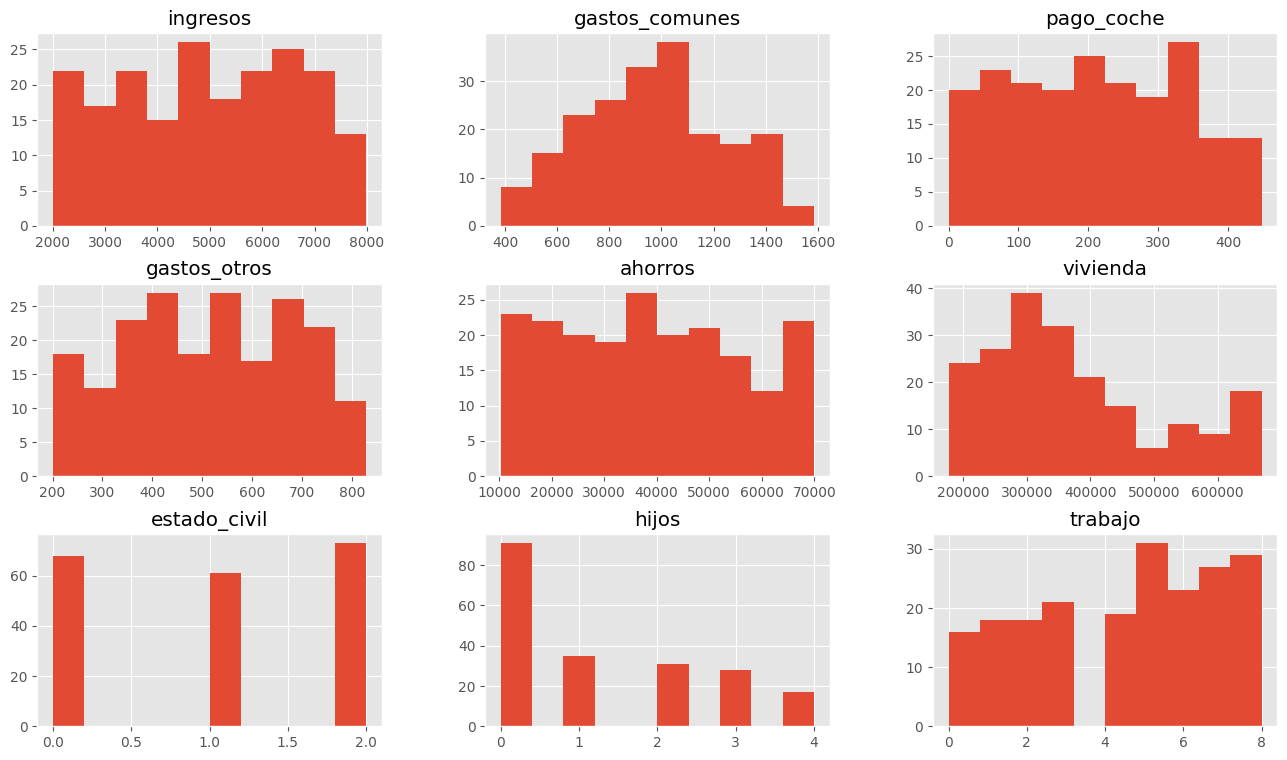

In [ ]:
dataframe.drop(['comprar'], axis=1).hist()
plt.show()

Se crean dos columnas en la tabla:  gastos (donde se sgruparon los gastos) y financiar (el cual es la resta del precio de la vivienda con los ahorros).

In [ ]:
dataframe['gastos']=(dataframe['gastos_comunes']+dataframe['gastos_otros']+dataframe['pago_coche'])
dataframe['financiar']=dataframe['vivienda']-dataframe['ahorros']
dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


Resumen estadistico mediante la funcion describe(), de la libreria Pandas.

In [ ]:
reduced = dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


Se utilizan las 5 mejores caracteristicas utilizando la clase SelectKBest de la libreria SkLearn.

In [ ]:
X=dataframe.drop(['comprar'], axis=1)
y=dataframe['comprar']

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


En la siguiente grafica se observa el grado de correlacion que tienen las 5 caracteristicas utilizadas.

<Axes: title={'center': 'Pearson Correlation of Features'}>

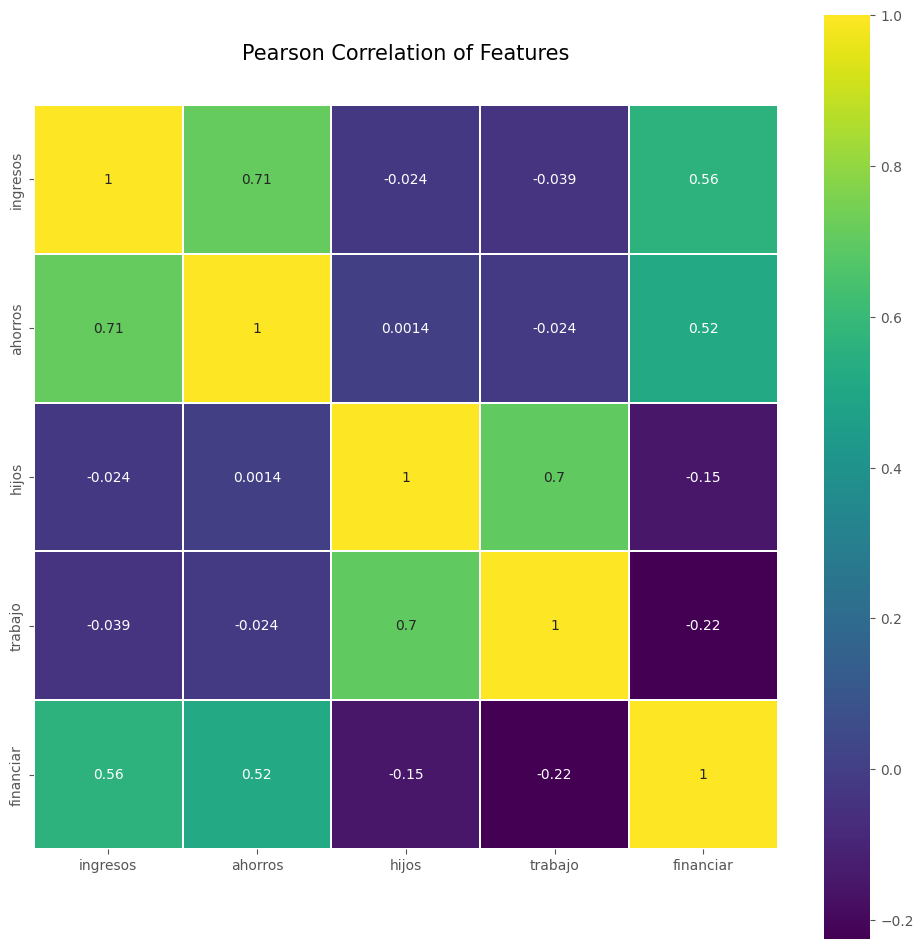

In [ ]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

A continuacion se dividen los datos de entrada en entrenamiento y prueba.

In [ ]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6)
y_train =X_train["comprar"]
y_test = X_test["comprar"]

Se crea el modelo el cual comienza a aprender mediante la funcion fit().

Aqui observamos los resultados y se obtuvo un 90% de precision en la prueba.

In [ ]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Ahora se pone a prueba el modelo con los siguientes casos:
1. Una familia, sin hijos con ingresos de 2,000 dls mensuales .
Ahorros de 5,000 y desean comprar una casa de 200,000 dls.
2. Una familia con 2 hijos, con ingresos de 6,000 dls mensuales.
Ahorros de 34,000 dls, y desean comprar una casa de 320,000 dls.

In [ ]:
#                 ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
print(gnb.predict([[2000,        5000,     0,       5,         200000],
                   [6000,        34000,    2,       5,         320000] ]))
#Resultado esperado 0-Alquilar, 1-Comprar casa

[0 1]


Los resultados fueron los siguientes:
1. Para este caso, el modelo recomienda alquilar (0).
2. Parra este caso, el modelo recomienda comprar (1).